<a target="_blank" href="https://colab.research.google.com/github/rcabanasdepaz/ME-BigData/blob/main/MetropolisHastings/bivariate_normal_mh.ipynb">  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Ejemplo con Metropolis Hastings: Bivariada Normal

En primer lugar, debemos definir la función proporcial $q(\theta_1, \theta_2)$, en este caso será la función de densidad conjunta.

In [1]:
dbnorm <- function(x, y, mu_x, mu_y, sigma_x, sigma_y, rho) {
  z <- ((x - mu_x)^2 / sigma_x^2 - 2 * rho * (x - mu_x) * (y - mu_y)
        / (sigma_x * sigma_y) + (y - mu_y)^2 / sigma_y^2) / (2 * (1 - rho^2))
  1 / (2 * pi * sigma_x * sigma_y * sqrt(1 - rho^2)) * exp(-z)
}


Definimos los parámetros de la simulación: número de puntos, parámetros de la distribución objetivo y valor inicial

In [2]:
n_points = 10000
mu1 = 0
mu2 = 0
sigma1=1
sigma2=1
rho=0.8
theta0 = c(3,3)


El siguiente fragmento de código implementa el bucle para generar la secuencia de Markov:

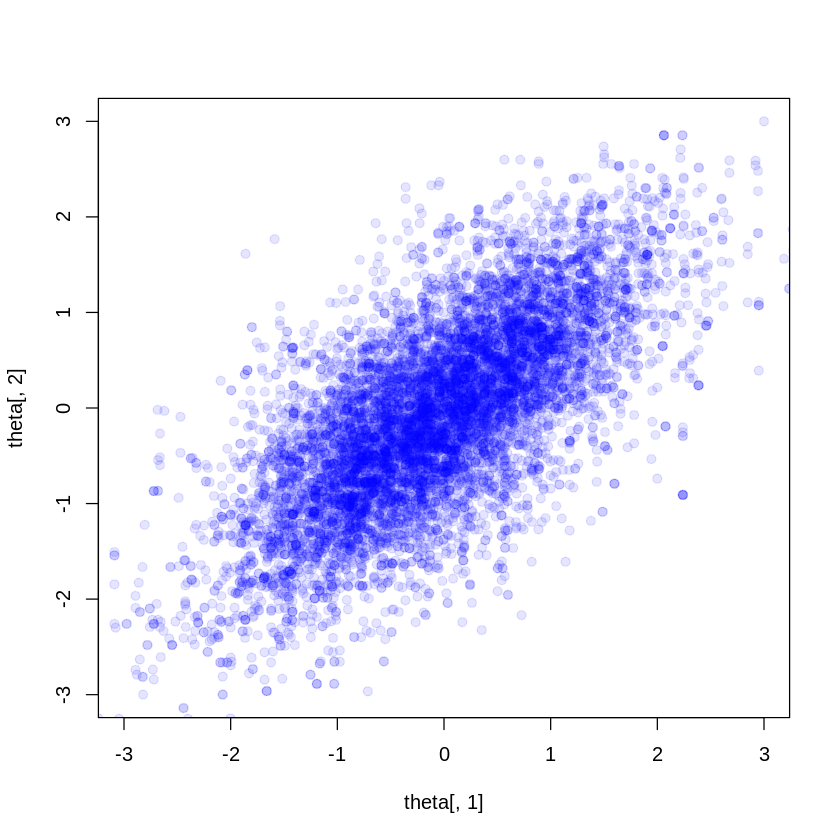

In [3]:
theta = matrix(theta0, nrow=n_points, ncol=2, byrow=TRUE)


for (t in 2:n_points) {
  theta1_prop = rnorm(1, theta[t-1,1],1)
  alpha = dbnorm(theta1_prop, theta[t-1,2],mu1,mu2,sigma1,sigma2,rho) / dbnorm(theta[t-1,1], theta[t-1,2],mu1,mu2,sigma1,sigma2,rho)
  u = runif(1,0,1)
  theta[t,1] = ifelse(u<=alpha, theta1_prop, theta[t-1,1])

  theta2_prop = rnorm(1, theta[t-1,2],1)
  alpha = dbnorm(theta[t-1,1], theta2_prop,mu1,mu2,sigma1,sigma2,rho) / dbnorm(theta[t-1,1], theta[t-1,2],mu1,mu2,sigma1,sigma2,rho)
  runif(1,0,1)
  theta[t,2] = ifelse(u<=alpha, theta2_prop, theta[t-1,2])
}

plot(theta[,1], theta[,2], xlim=c(-3,3), ylim=c(-3,3), pch=19, col = rgb(red = 0, green = 0, blue = 1, alpha = 0.10))
